In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from numpy import log,dot,e,shape
from sklearn import datasets, metrics, preprocessing
from random import seed
from random import random
from math import exp


In [ ]:
data = pd.read_csv("/content/student-mat-pass-or-fail.csv")     
data.shape      #Size of data

(395, 30)

In [ ]:
data.head(395)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass
0,1,1,18,1,0,0,4,4,2,2,...,3,4,1,1,3,6,5,6,6,0
1,1,1,17,1,0,1,1,1,1,2,...,3,3,1,1,3,4,5,5,6,0
2,1,1,15,1,1,1,1,1,1,2,...,3,2,2,3,3,10,7,8,10,1
3,1,1,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,15,1
4,1,1,16,1,0,1,3,3,1,2,...,3,2,1,2,5,4,6,10,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,0,20,1,1,0,2,2,1,2,...,5,4,4,5,4,11,9,9,9,0
391,0,0,17,1,1,1,3,1,2,1,...,4,5,3,4,2,3,14,16,16,1
392,0,0,21,0,0,1,1,1,1,1,...,5,3,3,3,3,3,10,8,7,0
393,0,0,18,0,1,1,3,2,3,1,...,4,1,3,4,5,0,11,12,10,1


In [ ]:
# intialize network
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network

  #The seed() method is used to initialize the random number generator.
seed(1)
network = initialize_network(3, 2, 3)
for layer in network:
	print(layer)

[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614, 0.2550690257394217]}, {'weights': [0.49543508709194095, 0.4494910647887381, 0.651592972722763, 0.7887233511355132]}]
[{'weights': [0.0938595867742349, 0.02834747652200631, 0.8357651039198697]}, {'weights': [0.43276706790505337, 0.762280082457942, 0.0021060533511106927]}, {'weights': [0.4453871940548014, 0.7215400323407826, 0.22876222127045265]}]


In [ ]:
# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation
 
# Transfer neuron activation
def transfer(activation):
	return 1.0 / (1.0 + exp(-activation))

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Train: 0.845, Test: 0.810


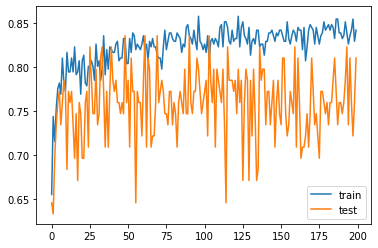

In [ ]:
 
# mlp for the blobs problem with stochastic gradient descent
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_blobs(n_samples=395, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = 316
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='sigmoid', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='sigmoid'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0, batch_size=1)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# Forward propagate input to a network output
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs
 
# test forward propagation
network = [[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}],
		[{'weights': [0.2550690257394217, 0.49543508709194095]}, {'weights': [0.4494910647887381, 0.651592972722763]}]]
row = [1, 0, 1]
output = forward_propagate(network, row)
print(output)

[0.6629970129852887, 0.7253160725279748]


In [ ]:
# Calculate the derivative of an neuron output
def transfer_derivative(output):
	return output * (1.0 - output)
 
# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(neuron['output'] - expected[j])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])
 
# test backpropagation of error
network = [[{'output': 0.7105668883115941, 'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}],
		[{'output': 0.6213859615555266, 'weights': [0.2550690257394217, 0.49543508709194095]}, {'output': 0.6573693455986976, 'weights': [0.4494910647887381, 0.651592972722763]}]]
expected = [0, 1]
backward_propagate_error(network, expected)
for layer in network:
	print(layer)

[{'output': 0.7105668883115941, 'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614], 'delta': 0.0005348048046610517}]
[{'output': 0.6213859615555266, 'weights': [0.2550690257394217, 0.49543508709194095], 'delta': 0.14619064683582808}, {'output': 0.6573693455986976, 'weights': [0.4494910647887381, 0.651592972722763], 'delta': -0.0771723774346327}]


In [ ]:
# Update network weights with error
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
			   neuron['weights'][j] -= l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] -= l_rate * neuron['delta']

  # Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
	for epoch in range(n_epoch):
		sum_error = 0
		for row in train:
			outputs = forward_propagate(network, row)
			expected = [0 for i in range(n_outputs)]
			expected[row[-1]] = 1
			sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
			backward_propagate_error(network, expected)
			update_weights(network, row, l_rate)
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))

In [ ]:
# Test training backprop algorithm
seed(1)
dataset = [[2.7810836,2.550537003,0],[1.465489372,2.362125076,0],[3.396561688,4.400293529,0],[1.38807019,1.850220317,0],[3.06407232,3.005305973,0],[7.627531214,2.759262235,1],[5.332441248,2.088626775,1],[6.922596716,1.77106367,1],[8.675418651,-0.242068655,1],[7.673756466,3.508563011,1]]

n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))
network = initialize_network(n_inputs, 2, n_outputs)
train_network(network, dataset, 0.5, 300, n_outputs)
for layer in network:
	print(layer)

>epoch=0, lrate=0.500, error=6.350
>epoch=1, lrate=0.500, error=5.531
>epoch=2, lrate=0.500, error=5.221
>epoch=3, lrate=0.500, error=4.951
>epoch=4, lrate=0.500, error=4.519
>epoch=5, lrate=0.500, error=4.173
>epoch=6, lrate=0.500, error=3.835
>epoch=7, lrate=0.500, error=3.506
>epoch=8, lrate=0.500, error=3.192
>epoch=9, lrate=0.500, error=2.898
>epoch=10, lrate=0.500, error=2.626
>epoch=11, lrate=0.500, error=2.377
>epoch=12, lrate=0.500, error=2.153
>epoch=13, lrate=0.500, error=1.953
>epoch=14, lrate=0.500, error=1.774
>epoch=15, lrate=0.500, error=1.614
>epoch=16, lrate=0.500, error=1.472
>epoch=17, lrate=0.500, error=1.346
>epoch=18, lrate=0.500, error=1.233
>epoch=19, lrate=0.500, error=1.132
>epoch=20, lrate=0.500, error=1.042
>epoch=21, lrate=0.500, error=0.961
>epoch=22, lrate=0.500, error=0.887
>epoch=23, lrate=0.500, error=0.821
>epoch=24, lrate=0.500, error=0.761
>epoch=25, lrate=0.500, error=0.707
>epoch=26, lrate=0.500, error=0.658
>epoch=27, lrate=0.500, error=0.613
>e

In [ ]:
# Test training backprop algorithm
seed(1)
dataset = [[2.7810836,2.550537003,0],[1.465489372,2.362125076,0],[3.396561688,4.400293529,0],[1.38807019,1.850220317,0],[3.06407232,3.005305973,0],[7.627531214,2.759262235,1],[5.332441248,2.088626775,1],[6.922596716,1.77106367,1],[8.675418651,-0.242068655,1],[7.673756466,3.508563011,1]]

n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))
network = initialize_network(n_inputs, 2, n_outputs)
train_network(network, dataset, 0.8, 300, n_outputs)
for layer in network:
	print(layer)

>epoch=0, lrate=0.800, error=6.128
>epoch=1, lrate=0.800, error=5.333
>epoch=2, lrate=0.800, error=5.001
>epoch=3, lrate=0.800, error=4.400
>epoch=4, lrate=0.800, error=3.882
>epoch=5, lrate=0.800, error=3.376
>epoch=6, lrate=0.800, error=2.934
>epoch=7, lrate=0.800, error=2.553
>epoch=8, lrate=0.800, error=2.228
>epoch=9, lrate=0.800, error=1.952
>epoch=10, lrate=0.800, error=1.717
>epoch=11, lrate=0.800, error=1.518
>epoch=12, lrate=0.800, error=1.348
>epoch=13, lrate=0.800, error=1.204
>epoch=14, lrate=0.800, error=1.081
>epoch=15, lrate=0.800, error=0.977
>epoch=16, lrate=0.800, error=0.887
>epoch=17, lrate=0.800, error=0.811
>epoch=18, lrate=0.800, error=0.744
>epoch=19, lrate=0.800, error=0.687
>epoch=20, lrate=0.800, error=0.636
>epoch=21, lrate=0.800, error=0.591
>epoch=22, lrate=0.800, error=0.552
>epoch=23, lrate=0.800, error=0.517
>epoch=24, lrate=0.800, error=0.485
>epoch=25, lrate=0.800, error=0.456
>epoch=26, lrate=0.800, error=0.431
>epoch=27, lrate=0.800, error=0.407
>e

In [ ]:
# Test training backprop algorithm
seed(1)
dataset = [[2.7810836,2.550537003,0],[1.465489372,2.362125076,0],[3.396561688,4.400293529,0],[1.38807019,1.850220317,0],[3.06407232,3.005305973,0],[7.627531214,2.759262235,1],[5.332441248,2.088626775,1],[6.922596716,1.77106367,1],[8.675418651,-0.242068655,1],[7.673756466,3.508563011,1]]

n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))
network = initialize_network(n_inputs, 2, n_outputs)
train_network(network, dataset, 0.2, 300, n_outputs)
for layer in network:
	print(layer)

>epoch=0, lrate=0.200, error=6.559
>epoch=1, lrate=0.200, error=6.091
>epoch=2, lrate=0.200, error=5.704
>epoch=3, lrate=0.200, error=5.427
>epoch=4, lrate=0.200, error=5.247
>epoch=5, lrate=0.200, error=5.126
>epoch=6, lrate=0.200, error=5.027
>epoch=7, lrate=0.200, error=4.917
>epoch=8, lrate=0.200, error=4.760
>epoch=9, lrate=0.200, error=4.556
>epoch=10, lrate=0.200, error=4.374
>epoch=11, lrate=0.200, error=4.224
>epoch=12, lrate=0.200, error=4.087
>epoch=13, lrate=0.200, error=3.954
>epoch=14, lrate=0.200, error=3.822
>epoch=15, lrate=0.200, error=3.692
>epoch=16, lrate=0.200, error=3.563
>epoch=17, lrate=0.200, error=3.436
>epoch=18, lrate=0.200, error=3.310
>epoch=19, lrate=0.200, error=3.187
>epoch=20, lrate=0.200, error=3.067
>epoch=21, lrate=0.200, error=2.950
>epoch=22, lrate=0.200, error=2.836
>epoch=23, lrate=0.200, error=2.725
>epoch=24, lrate=0.200, error=2.619
>epoch=25, lrate=0.200, error=2.516
>epoch=26, lrate=0.200, error=2.418
>epoch=27, lrate=0.200, error=2.323
>e

In [ ]:
# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation
 
# Transfer neuron activation
def transfer(activation):
	return 1.0 / (1.0 + exp(-activation))
 
# Forward propagate input to a network output
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs
 
# Make a prediction with a network
def predict(network, row):
	outputs = forward_propagate(network, row)
	return outputs.index(max(outputs))
 
# Test making predictions with the network
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
network = [[{'weights': [-1.482313569067226, 1.8308790073202204, 1.078381922048799]}, {'weights': [0.23244990332399884, 0.3621998343835864, 0.40289821191094327]}],
	[{'weights': [2.5001872433501404, 0.7887233511355132, -1.1026649757805829]}, {'weights': [-2.429350576245497, 0.8357651039198697, 1.0699217181280656]}]]
for row in dataset:
	prediction = predict(network, row)
	print('Expected=%d, Got=%d' % (row[-1], prediction))

Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
